In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("/content/Titanic-Dataset.csv")

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


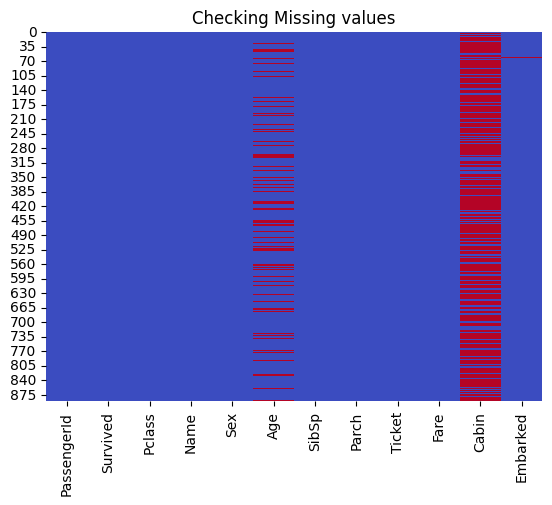

In [12]:
sns.heatmap(df.isnull(), cmap='coolwarm', cbar=False)
plt.title('Checking Missing values')
plt.show()

In [13]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


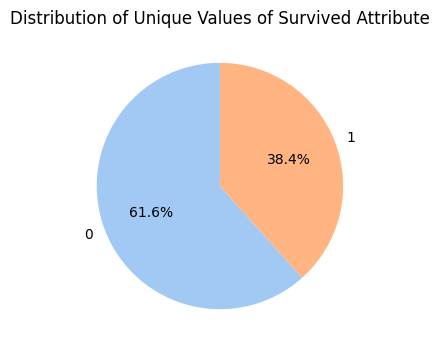

In [14]:
plt.figure(figsize=(4,4))
sns.set_palette('pastel')
plt.pie(df['Survived'].value_counts(), labels=df['Survived'].value_counts().index, autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Unique Values of Survived Attribute')
plt.show()

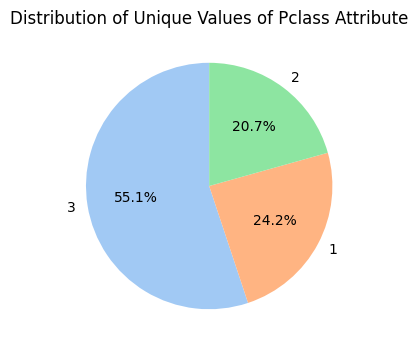

In [15]:
plt.figure(figsize=(4,4))
sns.set_palette('pastel')
plt.pie(df['Pclass'].value_counts(), labels=df['Pclass'].value_counts().index, autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Unique Values of Pclass Attribute')
plt.show()

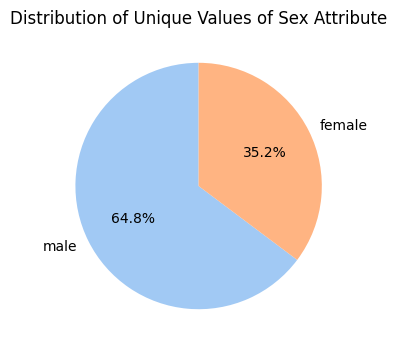

In [16]:
plt.figure(figsize=(4,4))
sns.set_palette('pastel')
plt.pie(df['Sex'].value_counts(), labels=df['Sex'].value_counts().index, autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Unique Values of Sex Attribute')
plt.show()

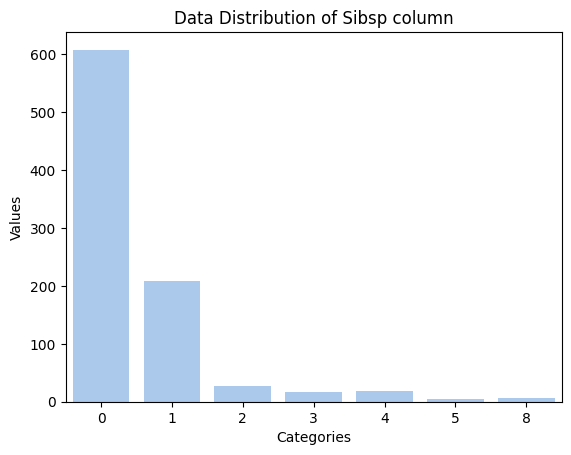

In [17]:
sns.barplot(x = df['SibSp'].value_counts().index,y = df['SibSp'].value_counts().values)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Data Distribution of Sibsp column')
plt.show()

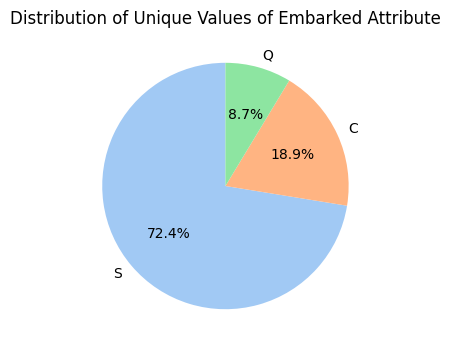

In [18]:
plt.figure(figsize=(4,4))
sns.set_palette('pastel')
plt.pie(df['Embarked'].value_counts(), labels=df['Embarked'].value_counts().index, autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Unique Values of Embarked Attribute')
plt.show()

Text(0.5, 1.0, 'Age Distribution')

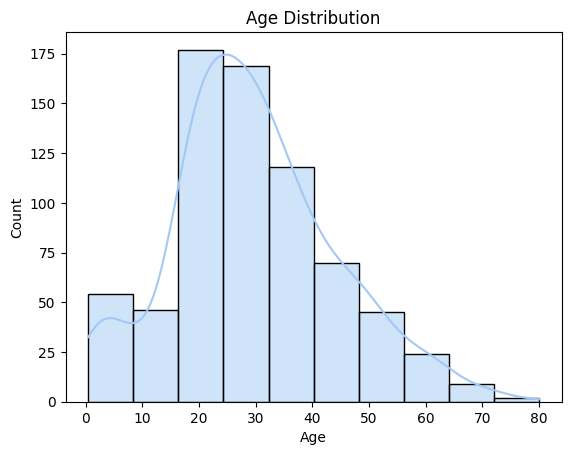

In [19]:
sns.histplot(df["Age"].dropna(), bins=10, kde=True)
plt.title("Age Distribution")

Text(0.5, 1.0, 'Fare Distribution')

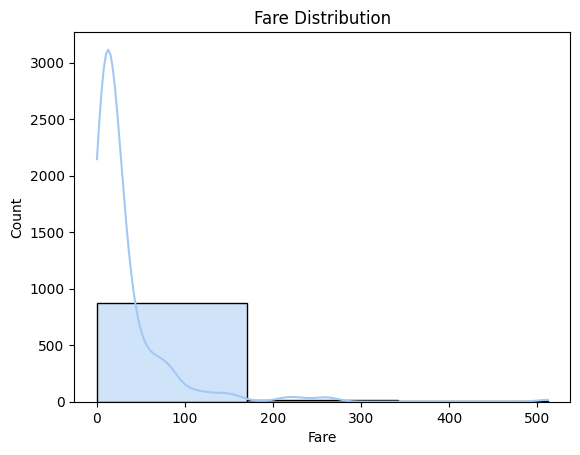

In [20]:
sns.histplot(df["Fare"].dropna(), bins=3, kde=True)
plt.title("Fare Distribution")

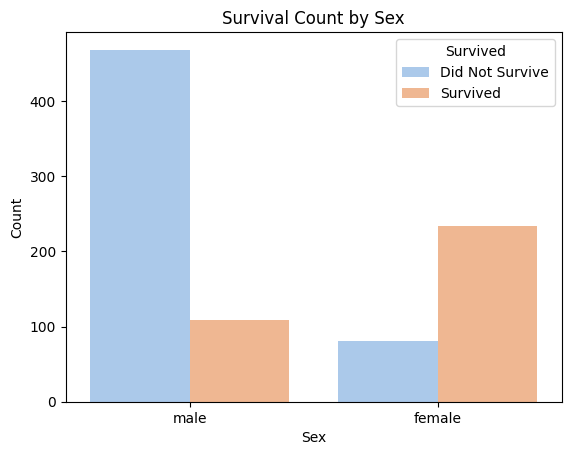

In [21]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["Did Not Survive", "Survived"])
plt.show()

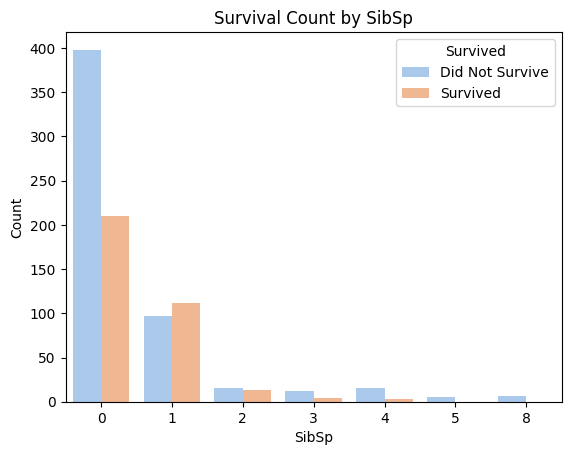

In [22]:
sns.countplot(x="SibSp", hue="Survived", data=df)
plt.title("Survival Count by SibSp")
plt.xlabel("SibSp")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["Did Not Survive", "Survived"])
plt.show()

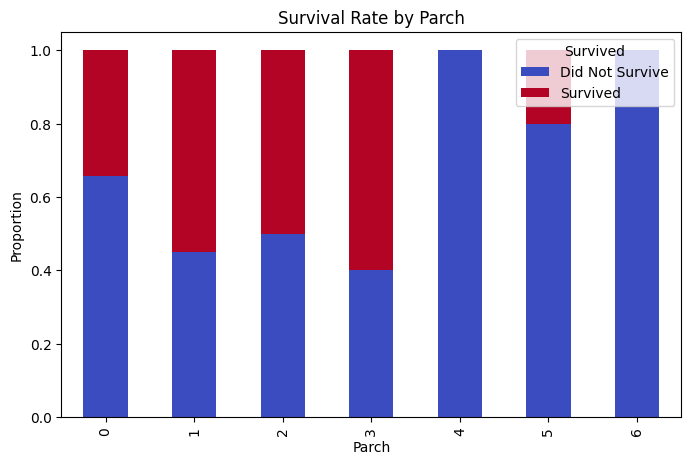

In [23]:
df.groupby("Parch")["Survived"].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True, figsize=(8,5), colormap="coolwarm")
plt.title("Survival Rate by Parch")
plt.xlabel("Parch")
plt.ylabel("Proportion")
plt.legend(title="Survived", labels=["Did Not Survive", "Survived"])
plt.show()

In [24]:
numeric_cols = df.select_dtypes(include=['number'])

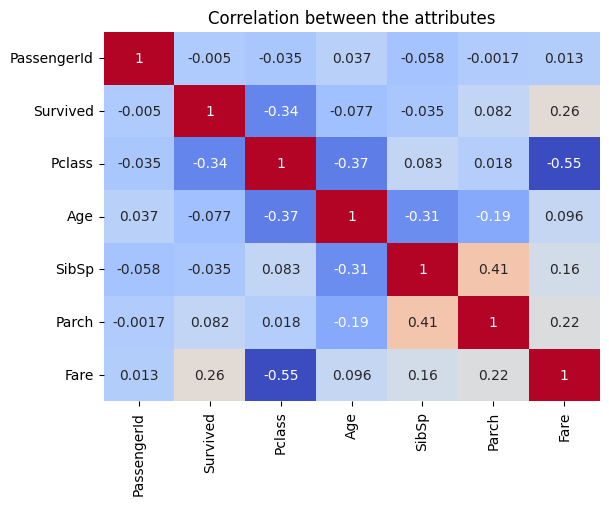

In [25]:
sns.heatmap(numeric_cols.corr(),cmap='coolwarm',cbar=False, annot=True)
plt.title('Correlation between the attributes')
plt.show()